In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from intersectiongraph import IntersectionGraph, IntersectionEdge, IntersectionNode

node1 = IntersectionNode(frozenset([1, 2, 3]))
node2 = IntersectionNode(frozenset([1, 2, 3]))
print(node1 == node2)

True


In [3]:
from queue import PriorityQueue

pq=PriorityQueue()
pq.put_nowait((1.22, "1fsfdax"))
pq.put_nowait((1.21, "4xadfa"))
pq.put_nowait((1.43, "3dfax"))

while not pq.empty():
    print(pq.get_nowait()[1])

4xadfa
1fsfdax
3dfax


In [4]:
import networkx as nx

G=nx.path_graph(4)
print(G.nodes)
print(G.edges)

G.remove_nodes_from([0,1])
print(G.nodes)
print(G.edges)

[0, 1, 2, 3]
[(0, 1), (1, 2), (2, 3)]
[2, 3]
[(2, 3)]


In [61]:
import simulator


grains, surfaces, graph, substrate = simulator.simulate_nucleation(rows=2,cols=2)
# for edge in graph.edges:
#     print([(surface.grain_id, surface.id) for surface in graph.edge_to_surfaces(edge)],[(surface.grain_id, surface.id) for surface in graph.edge_to_surfaces_all(edge)])
grains, event_handler = simulator.find_K_events(grains,graph, substrate)
# history, grains, graph, event_handler = simulator.simulate_lateral_growth(grains, graph, event_handler, time_limit=1000, max_steps=2)
history = simulator.simulate_vertical_growth(grains, graph, event_handler, time_limit=1000, max_steps=14)

print(graph.nodes)
print(graph.surfaces)
coord=[graph.get_node_position(node,event_handler.get_time()) for node in graph.nodes]
print(coord)

Simulating nucleation...
finding initial collision events
Add Event: 1 (19.68379515162141, 0, Event: [54.34677089 26.65895244  0.         19.68379515], Surfaces: [Surface: 236, 0, Surface: 236, 6, Surface: 237, 6, Surface: None, -1])
Add Event: 1 (18.34916766717431, 1, Event: [34.57790569 62.09928476  0.         18.34916767], Surfaces: [Surface: 238, 3, Surface: 236, 0, Surface: 236, 7, Surface: None, -1])
Add Event: 0 (17.61393659127743, 2, Event: [23.84232164 58.95191126  8.69518509 17.61393659], Surfaces: [Surface: 236, 5, Surface: 236, 7, Surface: 238, 3, Surface: 238, 6])
Add Event: 1 (30.82163248177675, 3, Event: [53.46053545 52.77410531  0.         30.82163248], Surfaces: [Surface: 236, 0, Surface: 239, 3, Surface: 239, 7, Surface: None, -1])
Add Event: 1 (35.160015282253426, 4, Event: [47.38136376 43.59611184  0.         35.16001528], Surfaces: [Surface: 238, 2, Surface: 238, 3, Surface: 237, 6, Surface: None, -1])
Add Event: 1 (33.68920342767408, 5, Event: [49.69983716 40.6408

In [59]:
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from intersectiongraph import IntersectionGraph
import simulator
import numpy as np


surface_list=[[[(0, 0, 0), (0, 0.1, 0.1),(0.1, 0.2, 0.1), (0.1, 0.1, 0)]],
            [[(0.1, 0.1, 0.1), (0.1, 0.2, 0.2),(0.2, 0.3, 0.2), (0.2, 0.2, 0.1)]] ]

grains, surfaces, graph, substrate = simulator.simulate_nucleation(rows=2,cols=2)
grains, event_handler = simulator.find_K_events(grains,graph, substrate)
history = simulator.simulate_vertical_growth(grains, graph, event_handler, time_limit=1000, max_steps=10)

# coord=[graph.get_node_position(node,event_handler.get_time()) for node in graph.nodes]
coord=[graph.get_node_position(node,10) for node in graph.nodes]


# get node coordinates, and plot nodes in 3D  

# change surface set to node set 

# get ordered vertices, plot vertices in 3D 

# plot surfaces using ordered vertices, with time and color specified 



fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)


for surface in surfaces: 

    surfaceNodes_ordered_list = []

    surfaceNodes = [node for node in graph.nodes if surface in node]

    print(len(surfaceNodes))
    
    while len(surfaceNodes)>0:

        surfaceNodes_ordered = []

        node1=surfaceNodes[0]

        surfaceNodes_ordered.append(node1)

        # neighbors=graph.neighbors(node1) 

        node_prev = node1

        node_prev_prev = None

        surfaceNodes.remove(node1)

        complete = False

        while not complete: 
            # complete=False

            for node_i in graph.neighbors(node_prev): 

                complete = True
                if surface in node_i and node_i in surfaceNodes: 
                    # print(node_i in surfaceNodes_ordered)
                    # print(node_i in surfaceNodes)

                    surfaceNodes_ordered.append(node_i)
                    # print("node added:",node_i)
                    # print("previous:",node_prev_prev)
                    # try:
                    surfaceNodes.remove(node_i)
                    # except:
                    #     print(surfaceNodes)

                    # neighbors=graph.neighbors(node_i)
                    
                    # node_prev_prev=node_prev
                    node_prev = node_i
                    complete = False
                    break

                # complete=True
            # print(surfaceNodes_ordered)
            # print(len(surfaceNodes))
        
            # if complete:
            #     break

        print(surfaceNodes_ordered)
        print(len(surfaceNodes))
        surfaceNodes_ordered_list.append(surfaceNodes_ordered)

    surface_vertices_coor= []

    normal = surface.v_mu[:3]

    intensity = 0.7+0.3*np.dot(normal, np.array([0,0,1]))
    
    alpha=1

    if surface.id in [0,1,2,3,4,5]:
        color = [(intensity*0.5647,intensity*0.9333,intensity*0.5647)]
    elif surface.id in [6,7]:
        color = [(intensity,intensity*0.7137,intensity*0.7569)]
    else:
        color = [(0,0,0)]
        alpha=0.1

    print(color)

    for i in surfaceNodes_ordered_list: 

        surface_vertices_coord = [graph.get_node_position(node,event_handler.get_time()) for node in i]

        print(surface_vertices_coord)

        # check surface id to decide color         

        surface_vertices_coord = [list( tuple(i) for i in surface_vertices_coord)]

        print(surface_vertices_coord)

        ax.add_collection3d(Poly3DCollection(surface_vertices_coord,facecolor=color, alpha=alpha, linewidths=1, edgecolors='dimgray'))


ax.set_xlim([-1, 100])
ax.set_ylim([-1, 100])
ax.set_zlim([-1, 100])

ax.set_box_aspect([1,1,1])


plt.show()


ModuleNotFoundError: No module named 'ipympl'

In [46]:
history = simulator.simulate_vertical_growth(grains, graph, event_handler)


AttributeError: 'int' object has no attribute 'get_nodes_in'

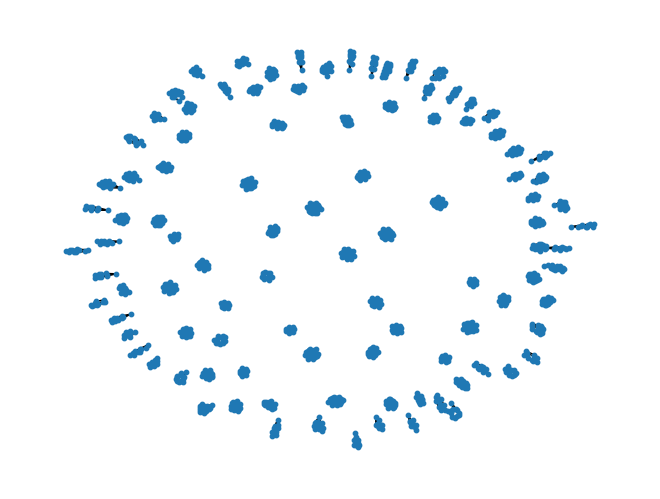

In [91]:

nx.draw(graph,node_size=10)
# graph.number_of_nodes()
# graph.number_of_edges()
